# Background estimation example

This is a 0th order estimation of what the background per area is. All operations are done in DET1 coordinates, since this is intended for use with StrayCat data.

Note that this is a 0th order estimation **only** since it's just using the existing data to estimate the count rates per area. You will then need to scale this to the area used for your StrayCat observation.

This is done using the nustar_gen.utols_straylight_background code. [Syntax is here on readthedocs](https://nustar-gen-utils.readthedocs.io/en/latest/utils.html#nustar_gen.utils.straylight_background).

In [1]:
# Set up files for example data

import os
here = os.getcwd()
example_data = os.path.join(here, 'example_data/30002041016/')
sky2det_file = os.path.join(example_data,'nu30002041016_sky2detA.fits')
reg_file = os.path.join(example_data, '30002041016A_StrayCatsI_704.reg')
det1_expo_file = os.path.join(example_data, 'nu30002041016A_det1_expo.fits')
det1im = os.path.join(example_data, 'nu30002041016A01_cl_3to20keV_det1.fits')

In [2]:
import nustar_gen.utils as utils
from importlib import reload
reload(utils)
from astropy import units as u

In [3]:
# Basic usage:

fluence = utils.straylight_background(sky2det_file=sky2det_file,
                                      reg_file=reg_file,
                                      det1_expo_file=det1_expo_file,
                                      det1im_file=det1im)
print(f'{fluence:8.4f}')

  0.0409 ct / (cm2 s)


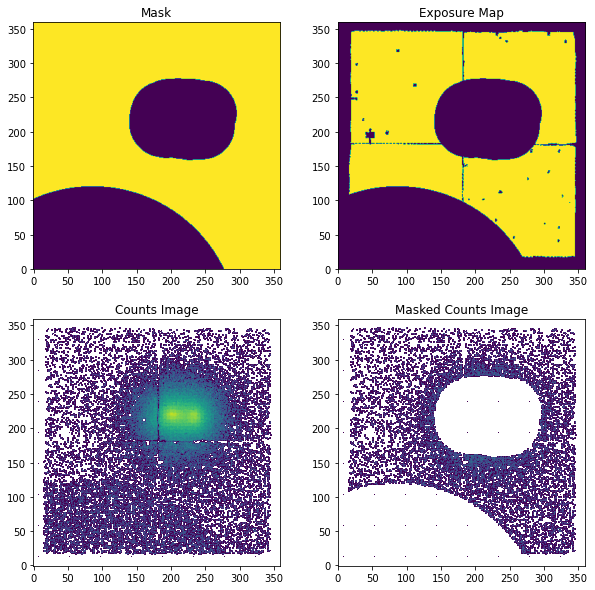

straylight_background:
Background area:    10.29 cm2
Background rate:  0.04095 ct / (cm2 s)

  0.0409 ct / (cm2 s)


In [4]:
# See diagnostic info:

fluence = utils.straylight_background(sky2det_file=sky2det_file,
                                      reg_file=reg_file,
                                      det1_expo_file=det1_expo_file,
                                      det1im_file=det1im,
                                      diag=True)
print(f'{fluence:8.4f}')

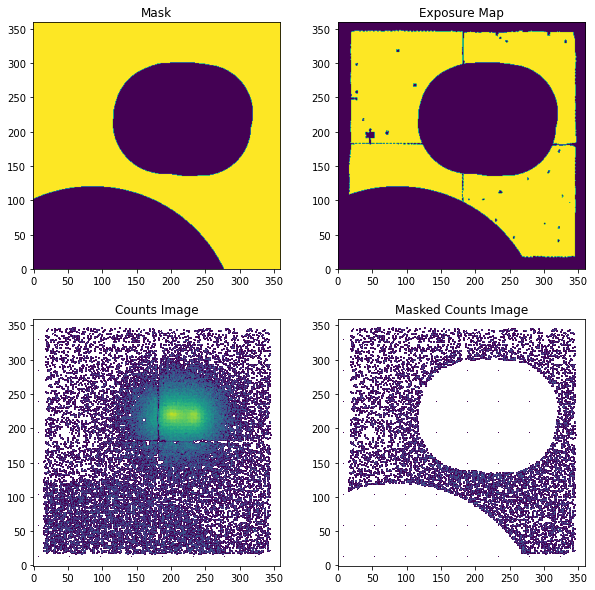

straylight_background:
Background area:     8.50 cm2
Background rate:  0.03235 ct / (cm2 s)

  0.0323 ct / (cm2 s)


In [5]:
# There's still some source flux, so increase the source exclusion region:

src_rad = 3*u.arcmin
fluence = utils.straylight_background(sky2det_file=sky2det_file,
                                      reg_file=reg_file,
                                      det1_expo_file=det1_expo_file,
                                      det1im_file=det1im,
                                      src_rad=src_rad,
                                      diag=True)
print(f'{fluence:8.4f}')